In [28]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
digit = pd.read_csv('./data/digit_train.csv')

In [3]:
# 데이터 확인
# 주의점 : 데이터가 너무 크다. 그대로 불러오면 메모리가 버티지 못한다.
# head()함수를 이용해서 데이터의 형태를 알아보자
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
digit.shape

(42000, 785)

## EDA

In [5]:
img0 = digit.iloc[0, 1:]

In [6]:
print(max(img0))
print(min(img0))

255
0


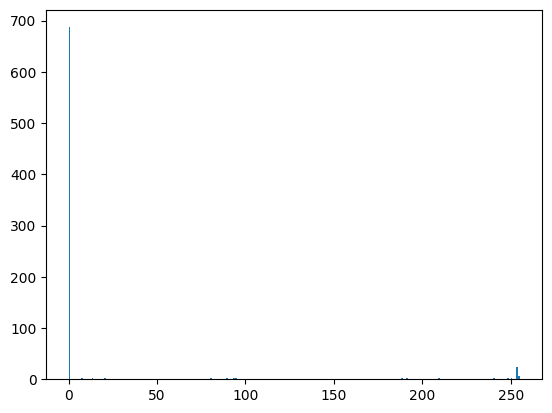

In [7]:
plt.hist(img0, bins=255)
plt.show()

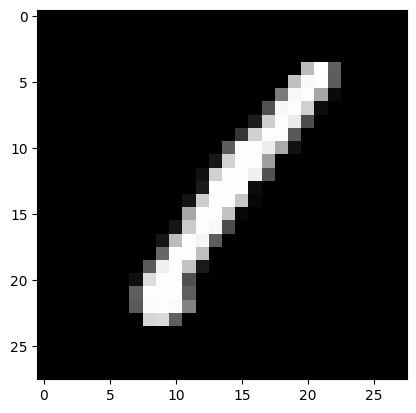

In [8]:
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

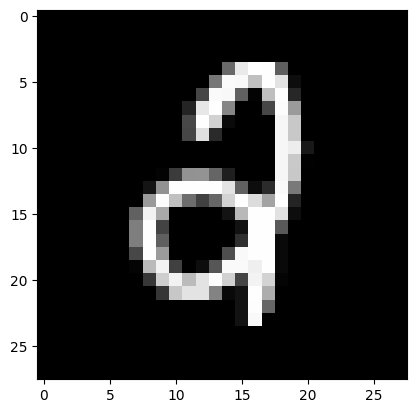

In [9]:
img0 = digit.iloc[10000, 1:]
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

In [10]:
X = digit.iloc[ 0 : 5000, 1: ]
y = digit.iloc[ 0 : 5000, 0 ]
print(X.shape)
print(y.shape)


(5000, 784)
(5000,)


In [11]:
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3500, 784), (1500, 784), (3500,), (1500,))

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logi = LogisticRegression()

In [15]:
logi.fit(x_train, y_train)

LogisticRegression()

In [16]:
pred = logi.predict(x_test)

In [17]:
logi.score(x_test, y_test)

0.8773333333333333

In [18]:
logi.score(x_train, y_train)

1.0

In [19]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(logi, x_train, y_train)
print(result.mean())

0.8797142857142857


### 데이터 스케일링


In [20]:
# 스케일링 모듈 불러오기
# 1. standard scaler
from sklearn.preprocessing import StandardScaler
# 2. MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

In [21]:
# 모듈이 같은 위치에 존재할때는 콤마를 통해 여러 모듈을 불러올 수 있다.

In [22]:
ss_scale = StandardScaler()
mm_scale = MinMaxScaler()

In [25]:
# 스케일러 학습
# 1. 스탠다드 스케일러 학습
ss_scale.fit(x_train)
# 2. minmax 스케일러 학습
mm_scale.fit(x_train)

MinMaxScaler()

(array([114., 516.,  15., 112.,  20.,   2.,   3.,   1.,   0.,   1.]),
 array([-1.14479403, -0.44818888,  0.24841628,  0.94502143,  1.64162658,
         2.33823173,  3.03483688,  3.73144203,  4.42804718,  5.12465233,
         5.82125749]),
 <BarContainer object of 10 artists>)

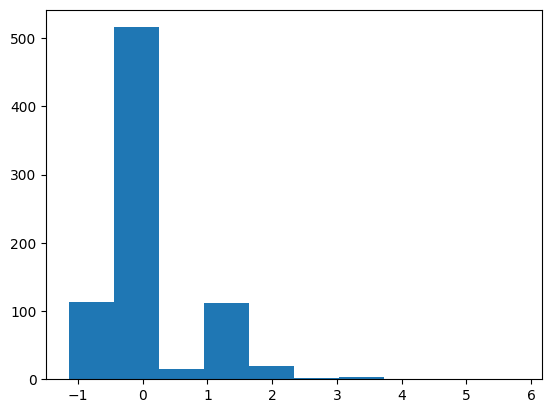

In [30]:
# 1. 스탠다드 스케일러를 통한 변환 진행하기
x_train_ss = ss_scale.transform(x_train)
x_test_ss = ss_scale.transform(x_test)
plt.hist(x_train_ss[0])

In [31]:
# 1. MinMax Scaler를 통한 데이터 스케일링 변환
x_train_mm = mm_scale.transform(x_train)
x_tset_mm = mm_scale.transform(x_test)

(array([616.,   5.,   4.,   2.,   6.,   9.,   6.,   2.,  16., 118.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

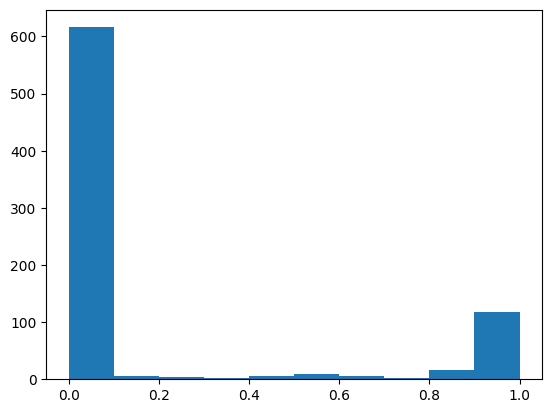

In [32]:
plt.hist(x_train_mm[0])

In [33]:
# 스케일링이 진행된 데이터를 가지고 모델을 학습
# 모델 객체 생성

In [38]:
# 스탠다드 스케일링된 데이터 학습
logi_ss = LogisticRegression()
logi_ss.fit(x_train_ss, y_train)

LogisticRegression()

In [39]:
# 스탠다드 스케일링된 데이터 교차검증
cross_val_score(logi_ss, x_train_ss, y_train)

array([0.86857143, 0.89714286, 0.88571429, 0.88428571, 0.89285714])

In [40]:
# 스탠다드 스케일링된 데이터 모델 평가
logi_ss.score(x_test_ss, y_test)

0.8873333333333333

In [43]:
# MinMax 스케일링된 데이터 학습
logi_mm = LogisticRegression()
logi_mm.fit(x_train_mm, y_train)

LogisticRegression()

In [44]:
# MinMax 스케일링된 데이터 교차검증
cross_val_score(logi_mm, x_train_ss, y_train)

array([0.86857143, 0.89714286, 0.88571429, 0.88428571, 0.89285714])

In [45]:
# MinMax 스케일링된 데이터 모델 평가
logi_mm.score(x_test_ss, y_test)

0.812

### knn, tree 모델 사용

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()

In [48]:
knn.fit(x_train, y_train)
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
knn.score(x_test, y_test)

0.922

In [50]:
tree.score(x_test, y_test)

0.752

### 분류의 불확실성
- 분류가 진행이 되고 있다. 어떤 방법으로 분류를 해내는 걸까

In [52]:
knn.predict_proba(x_test[100:200])

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0.2, 0. , 0. , 0.4, 0. , 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.4, 0.4, 0. , 0. , 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0. , 0.2, 0. , 0. , 0.6, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. 

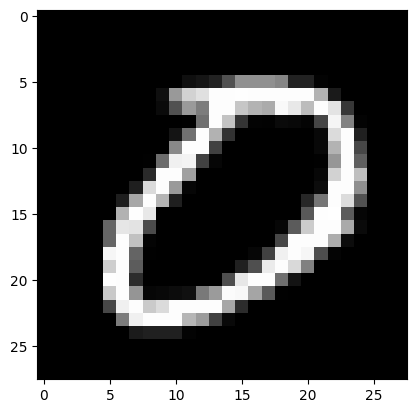

In [53]:
img0 = x_test.iloc[100]
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()